====================================================================================================================

====================================================================================================================

## Part I
# Data Acquisition and Manipulation

====================================================================================================================

In [1]:
import pandas as pd

# Replace 'your_file.csv' with the actual path to your CSV file
file = 'item_listing_category.csv'

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(file)

# Now you can work with the DataFrame 'df'
df

train_id                                     name  item_condition_id  \
0         128037                 Bundle for Sassy Sisters                  3   
1         491755                             PINK VS TANK                  2   
2         470924               Funko Pop Unmasked Cyclops                  1   
3         491263                          Baby Roshe Runs                  3   
4         836489           Baby Girl Ralph Lauren dresses                  3   
...          ...                                      ...                ...   
355803    760377                  Beats By Dre Solo White                  3   
355804    780889  4 New Leap Frog Leapster Learning Games                  1   
355805    650579                    Torrid bra size 42ddd                  3   
355806    481154                               Vans shoes                  2   
355807    361073    Kendra Scott Alex earrings in Magenta                  2   

                                          category_name    brand_name  price  \
0                           Women/Tops & Blouses/Blouse           NaN   16.0   
1                       Women/Tops & Blouses/Tank, Cami           NaN   17.0   
2                    Kids/Toys/Action Figures & Statues         Funko   30.0   
3                                 Kids/Boys 2T-5T/Shoes          Nike   19.0   
4                           Kids/Girls 0-24 Mos/Dresses  Ralph Lauren   24.0   
...                                                 ...           ...    ...   
355803  Electronics/TV, Audio & Surveillance/Headphones         Beats   45.0   
355804                   Kids/Toys/Learning & Education     Leap Frog    9.0   
355805                             Women/Underwear/Bras        Torrid   20.0   
355806                       Men/Shoes/Fashion Sneakers          VANS   23.0   
355807                           Women/Jewelry/Earrings  Kendra Scott   38.0   

        shipping                                  clean_description  
0              0  max cleo black dress paper crane black tank to...  
1              0       sequin pink sign sequins missing gently worn  
2              1  box great condition comes soft pop protector p...  
3              0                 baby black nike roshe runs size 5c  
4              0  2 polo dresses 3 months wore washed dreft pink...  
...          ...                                                ...  
355803         1        beats dre solo white gently used work great  
355804         1  viewing 4 new leap frog leapster learning game...  
355805         1  couple places lace snagged tell fairly good co...  
355806         0                                            size 11  
355807         1                                    description yet  

[355808 rows x 8 columns]

### **Question 1.1**

**Answer:**

In [2]:
import pandas as pd

def missing_values_table(df):
    # Calculate the number of missing values per column
    missing_values = df.isnull().sum()
    
    # Filter columns with missing values
    missing_columns = missing_values[missing_values > 0]
    
    # Create a DataFrame to store the results
    missing_info = pd.DataFrame({'Missing Values': missing_columns, 'Percentage': (missing_columns / len(df)) * 100})
    
    # Sort by the percentage of missing values in descending order
    missing_info = missing_info.sort_values(by='Percentage', ascending=False)
    
    # Print the missing values information
    print("Columns with Missing Values:")
    print(missing_info)
    
    # Impute missing values with the mean for columns where it's applicable
    for column in missing_columns.index:
        if df[column].dtype in [int, float]:  # Check if the column contains numerical data
            df[column].fillna(df[column].mean(), inplace=True)
        else:
            # If imputation is not possible with mean value, print a message
            print(f"Cannot impute missing values for '{column}' with mean value because it contains non-numeric data.")
    
    # Return the DataFrame with imputed values
    return df

# Example usage:
# Assuming 'df' is your DataFrame
df = missing_values_table(df)


Columns with Missing Values:
                   Missing Values  Percentage
brand_name                 151956   42.707303
category_name                1539    0.432537
clean_description             194    0.054524
Cannot impute missing values for 'category_name' with mean value because it contains non-numeric data.
Cannot impute missing values for 'brand_name' with mean value because it contains non-numeric data.
Cannot impute missing values for 'clean_description' with mean value because it contains non-numeric data.


====================================================================================================================

### **Question 1.2**

**Answer:**

In [3]:
# DataFrame is named 'df' and the price column is named 'price'
median_price = df['price'].median()
print(f"Median Price: {median_price}")

Median Price: 17.0


In [4]:
percentile_90 = df['price'].quantile(0.90)
print(f"90th Percentile Price: {percentile_90}")

90th Percentile Price: 51.0


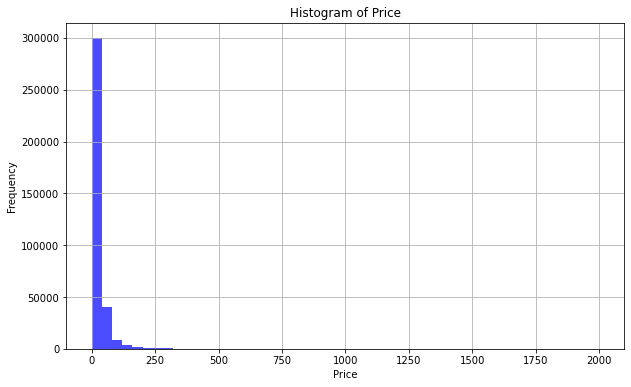

In [5]:
import matplotlib.pyplot as plt

# DataFrame is named 'df' and the price column is named 'price'
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=50, color='blue', alpha=0.7)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')
plt.grid(True)
plt.show()

====================================================================================================================

### **Question 1.3**

**Answer:**

In [6]:
# Assuming your DataFrame is named 'df' and the shipping column is named 'shipping'
total_items = len(df)
buyer_pays_count = df[df['shipping'] == 0]['shipping'].count()
percentage_buyer_pays = (buyer_pays_count / total_items) * 100
print(f"Percentage of Items Paid by Buyers: {percentage_buyer_pays:.2f}%")


Percentage of Items Paid by Buyers: 55.38%


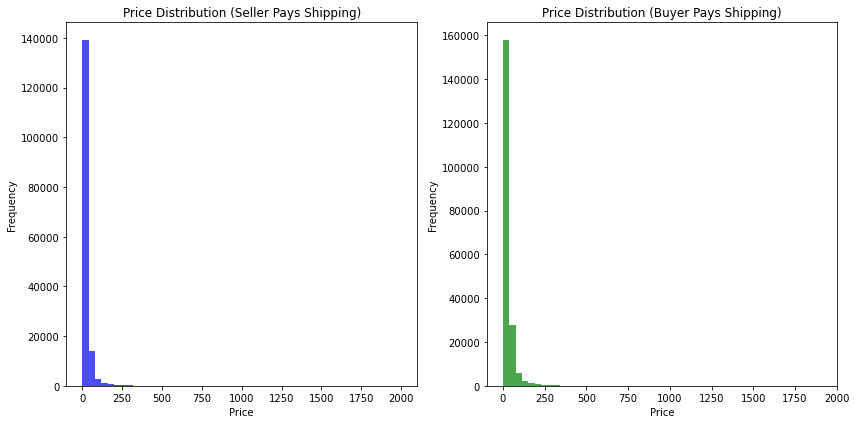

In [7]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and the price column is named 'price'
price_seller_pays = df[df['shipping'] == 1]['price']
price_buyer_pays = df[df['shipping'] == 0]['price']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(price_seller_pays, bins=50, color='blue', alpha=0.7)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution (Seller Pays Shipping)')

plt.subplot(1, 2, 2)
plt.hist(price_buyer_pays, bins=50, color='green', alpha=0.7)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution (Buyer Pays Shipping)')

plt.tight_layout()
plt.show()


In [8]:
median_price_seller_pays = price_seller_pays.median()
median_price_buyer_pays = price_buyer_pays.median()

print(f"Median Price (Seller Pays Shipping): ${median_price_seller_pays:.2f}")
print(f"Median Price (Buyer Pays Shipping): ${median_price_buyer_pays:.2f}")

# Determine if prices are higher when sellers pay for shipping
if median_price_seller_pays > median_price_buyer_pays:
    print("Items paid by sellers for shipping tend to have a higher median price.")
elif median_price_seller_pays < median_price_buyer_pays:
    print("Items paid by buyers for shipping tend to have a higher median price.")
else:
    print("There's no significant difference in median prices between the two shipping types.")


Median Price (Seller Pays Shipping): $14.00
Median Price (Buyer Pays Shipping): $19.00
Items paid by buyers for shipping tend to have a higher median price.


====================================================================================================================

### **Question 1.4**

**Answer:**

Count of Rows for Each Item Condition Value:
1    153402
2     89843
3    104248
4      7768
5       547
Name: item_condition_id, dtype: int64


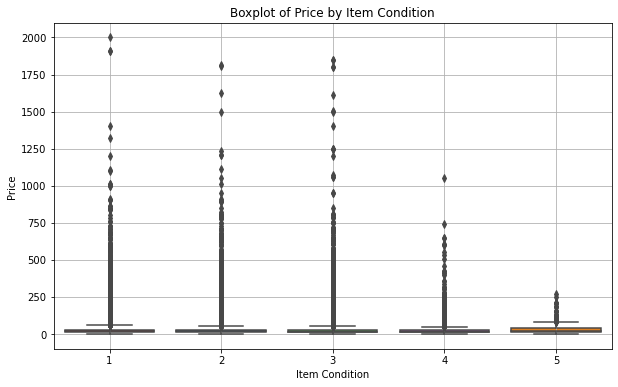

Median Prices by Item Condition:
item_condition_id
1    18.0
2    17.0
3    16.0
4    15.0
5    19.0
Name: price, dtype: float64


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df' and the columns are named 'item_condition_id' and 'price'

# Count the rows for each item condition value
item_condition_counts = df['item_condition_id'].value_counts().sort_index()
print("Count of Rows for Each Item Condition Value:")
print(item_condition_counts)

# Draw a boxplot to visualize the relationship between item condition and price
plt.figure(figsize=(10, 6))
sns.boxplot(x='item_condition_id', y='price', data=df, palette='Set1')
plt.xlabel('Item Condition')
plt.ylabel('Price')
plt.title('Boxplot of Price by Item Condition')
plt.xticks(range(5), ['1', '2', '3', '4', '5'])
plt.grid(True)
plt.show()

# Analyze whether better item condition correlates with a higher median price
# In a boxplot, if a box for a condition value is higher, it suggests a higher median price for that condition.
# You can also calculate the median price for each condition to provide more details.

median_prices_by_condition = df.groupby('item_condition_id')['price'].median()
print("Median Prices by Item Condition:")
print(median_prices_by_condition)


====================================================================================================================

### **Question 1.5**

**Answer:**

In [10]:
# DataFrame is named 'df' and the category column is named 'category_name'

# Find the number of unique categories
unique_categories = df['category_name'].nunique()
print(f"Number of Unique Categories: {unique_categories}")

# Filter the DataFrame for items with the worst condition (highest item_condition_id)
worst_condition_items = df[df['item_condition_id'] == df['item_condition_id'].max()]

# Find the top 3 categories for items with the worst condition
top_categories_worst_condition = worst_condition_items['category_name'].value_counts().head(3)
print("Top 3 Categories for Items with Worst Condition:")
print(top_categories_worst_condition)


Number of Unique Categories: 1135
Top 3 Categories for Items with Worst Condition:
Electronics/Cell Phones & Accessories/Cell Phones & Smartphones    137
Electronics/Video Games & Consoles/Games                            42
Electronics/Video Games & Consoles/Consoles                         35
Name: category_name, dtype: int64


====================================================================================================================

### **Question 1.6**

**Answer:**

In [11]:
def split_category_name(category_name):
    try:
        parts = category_name.split('/')
        if len(parts) == 3:
            return parts
        elif len(parts) == 2:
            return [parts[0], parts[1], 'Category Unknown']
        elif len(parts) == 1:
            return [parts[0], 'Category Unknown', 'Category Unknown']
    except AttributeError:
        # Handle missing values (NaN)
        return ['Category Unknown', 'Category Unknown', 'Category Unknown']

# Apply the split_category_name function to create new columns
df[['main_cat', 'subcat_1', 'subcat_2']] = df['category_name'].apply(split_category_name).apply(pd.Series)

# Print the DataFrame to show the top 5 rows for the new columns
df.head(5)


train_id                            name  item_condition_id  \
0    128037        Bundle for Sassy Sisters                  3   
1    491755                    PINK VS TANK                  2   
2    470924      Funko Pop Unmasked Cyclops                  1   
3    491263                 Baby Roshe Runs                  3   
4    836489  Baby Girl Ralph Lauren dresses                  3   

                        category_name    brand_name  price  shipping  \
0         Women/Tops & Blouses/Blouse           NaN   16.0         0   
1     Women/Tops & Blouses/Tank, Cami           NaN   17.0         0   
2  Kids/Toys/Action Figures & Statues         Funko   30.0         1   
3               Kids/Boys 2T-5T/Shoes          Nike   19.0         0   
4         Kids/Girls 0-24 Mos/Dresses  Ralph Lauren   24.0         0   

                                   clean_description main_cat        subcat_1  \
0  max cleo black dress paper crane black tank to...    Women  Tops & Blouses   
1       sequin pink sign sequins missing gently worn    Women  Tops & Blouses   
2  box great condition comes soft pop protector p...     Kids            Toys   
3                 baby black nike roshe runs size 5c     Kids      Boys 2T-5T   
4  2 polo dresses 3 months wore washed dreft pink...     Kids  Girls 0-24 Mos   

                   subcat_2  
0                    Blouse  
1                Tank, Cami  
2  Action Figures & Statues  
3                     Shoes  
4                   Dresses

====================================================================================================================

### **Question 1.7**

**Answer:**

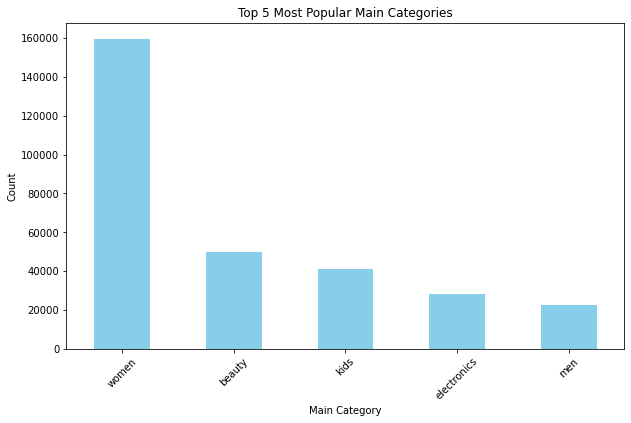

Number of Unique Main Categories: 11
Number of Unique First Sub-Categories: 114
Number of Unique Second Sub-Categories: 782


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to convert text to lowercase
def convert_to_lowercase(text):
    if isinstance(text, str):
        return text.lower()
    else:
        return text

# Apply the function to clean the text in each of the three columns
df['main_cat'] = df['main_cat'].apply(convert_to_lowercase)
df['subcat_1'] = df['subcat_1'].apply(convert_to_lowercase)
df['subcat_2'] = df['subcat_2'].apply(convert_to_lowercase)

# Draw a bar chart for the top 5 most popular main categories
top_main_cat = df['main_cat'].value_counts().head(5)
plt.figure(figsize=(10, 6))
top_main_cat.plot(kind='bar', color='skyblue')
plt.xlabel('Main Category')
plt.ylabel('Count')
plt.title('Top 5 Most Popular Main Categories')
plt.xticks(rotation=45)
plt.show()

# Find the number of unique main categories, first sub-categories, and second sub-categories
unique_main_cat = df['main_cat'].nunique()
unique_subcat_1 = df['subcat_1'].nunique()
unique_subcat_2 = df['subcat_2'].nunique()

print(f"Number of Unique Main Categories: {unique_main_cat}")
print(f"Number of Unique First Sub-Categories: {unique_subcat_1}")
print(f"Number of Unique Second Sub-Categories: {unique_subcat_2}")


====================================================================================================================

### **Question 1.8**

**Answer:**

Median Price by Main Category:
main_cat
beauty                    15.0
category unknown          18.0
electronics               15.0
handmade                  12.0
home                      18.0
kids                      14.0
men                       21.0
other                     14.0
sports & outdoors         16.0
vintage & collectibles    16.0
women                     19.0
Name: price, dtype: float64


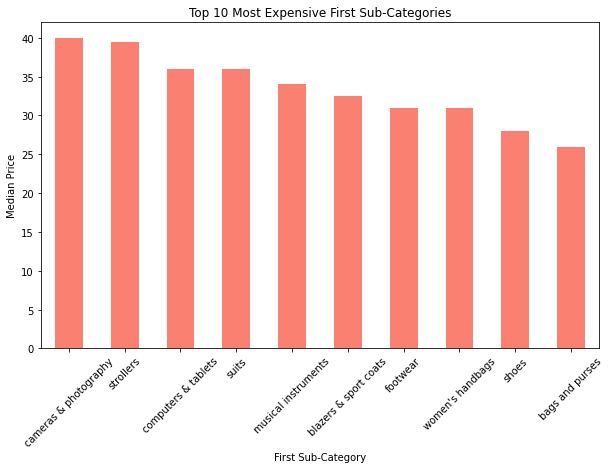

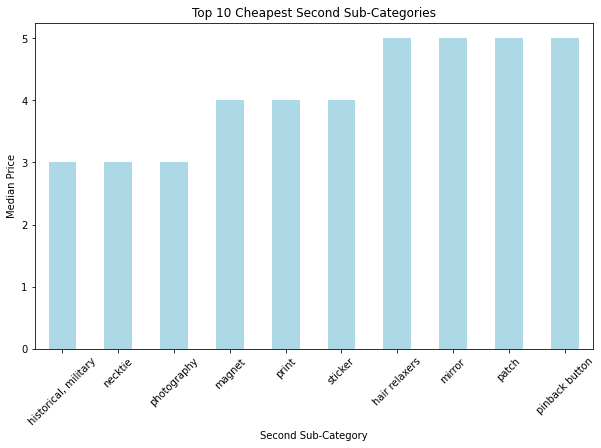

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Find the median price for all categories in the 'main_cat' column
median_price_by_main_cat = df.groupby('main_cat')['price'].median()
print("Median Price by Main Category:")
print(median_price_by_main_cat)

# Draw a bar chart for the top 10 most expensive first sub-categories
top_10_expensive_subcat_1 = df.groupby('subcat_1')['price'].median().nlargest(10)
plt.figure(figsize=(10, 6))
top_10_expensive_subcat_1.plot(kind='bar', color='salmon')
plt.xlabel('First Sub-Category')
plt.ylabel('Median Price')
plt.title('Top 10 Most Expensive First Sub-Categories')
plt.xticks(rotation=45)
plt.show()

# Draw a bar chart for the top 10 cheapest second sub-categories
top_10_cheapest_subcat_2 = df.groupby('subcat_2')['price'].median().nsmallest(10)
plt.figure(figsize=(10, 6))
top_10_cheapest_subcat_2.plot(kind='bar', color='lightblue')
plt.xlabel('Second Sub-Category')
plt.ylabel('Median Price')
plt.title('Top 10 Cheapest Second Sub-Categories')
plt.xticks(rotation=45)
plt.show()


====================================================================================================================

### **Question 1.9**

**Answer:**

Median Price by Brand:
brand_name
% Pure               14.0
10.Deep              18.0
21men                10.0
3.1 Phillip Lim     232.5
3M®                  15.0
                    ...  
timi & leslie        65.0
tokidoki             18.0
totes ISOTONER       14.0
triangl swimwear     44.0
vineyard vines       21.0
Name: price, Length: 3047, dtype: float64


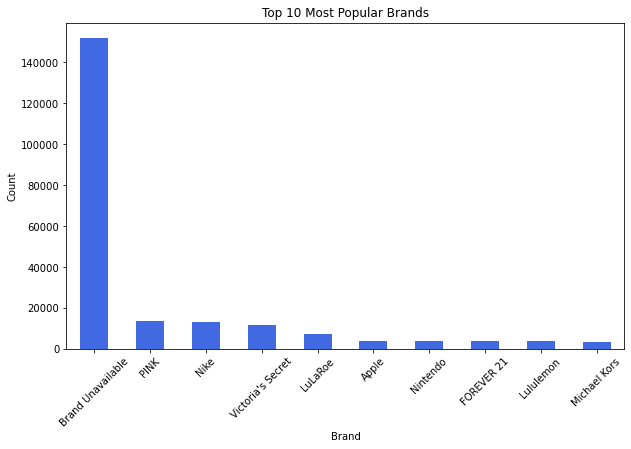

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Fill NaN values in the 'brand' column with 'brand unavailable'
df['brand_name'].fillna('Brand Unavailable', inplace=True)

# Find the median price for all brands
median_price_by_brand = df.groupby('brand_name')['price'].median()
print("Median Price by Brand:")
print(median_price_by_brand)

# Draw a bar chart for the top 10 most popular brands
top_10_popular_brands = df['brand_name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_10_popular_brands.plot(kind='bar', color='royalblue')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Top 10 Most Popular Brands')
plt.xticks(rotation=45)
plt.show()


====================================================================================================================

### **Question 1.10**

**Answer:**

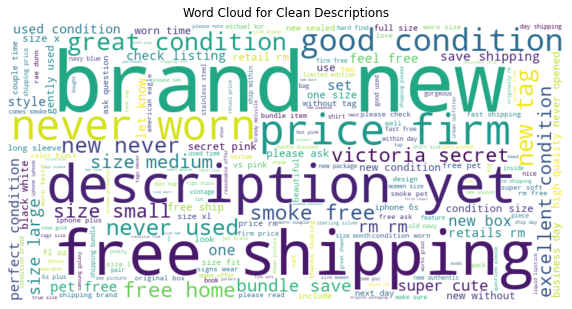

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# Fill NaN values in the 'clean_description' column with an empty string
df['clean_description'].fillna('', inplace=True)

# Combine the text in the 'clean_description' column
text = ' '.join(df['clean_description'])

# Generate and display the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Clean Descriptions')
plt.show()


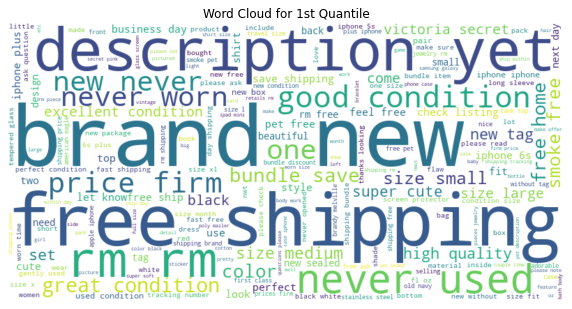

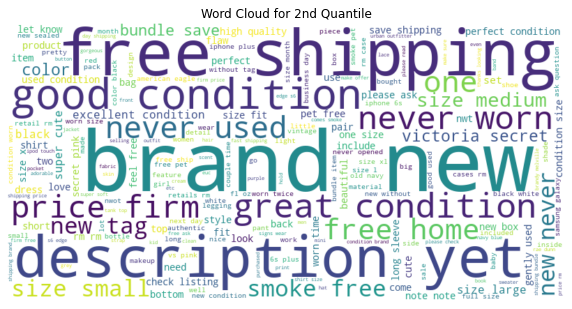

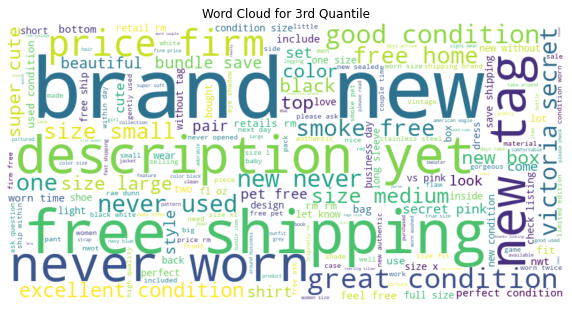

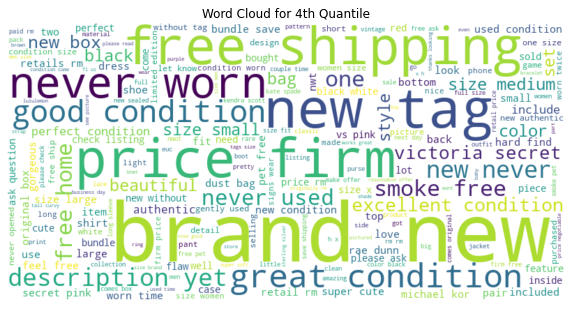

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Divide the data into quantiles based on price
quantiles = pd.qcut(df['price'], q=4, labels=['1st Quantile', '2nd Quantile', '3rd Quantile', '4th Quantile'])

# Create word clouds for each quantile
for label, group in df.groupby(quantiles):
    text = ' '.join(group['clean_description'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {label}')
    plt.show()


====================================================================================================================

====================================================================================================================

## Part II
# Time series analysis exercise

====================================================================================================================

### **Question 2.1**

**Answer:**

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
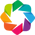

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Extra Libs
import matplotlib.dates as mdates
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')
from bokeh.models import HoverTool
from IPython.display import HTML, display

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.ensemble import IsolationForest

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller


In [5]:
df = pd.read_csv('nyc_taxi.csv')

In [6]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)


In [7]:
df_day = df['value'].resample('D').sum()
df_hour = df['value'].resample('H').sum()


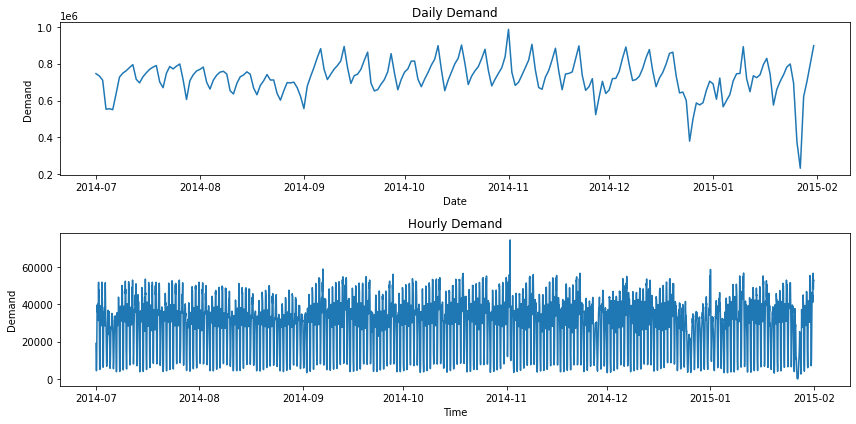

In [8]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(df_day.index, df_day.values)
plt.title('Daily Demand')
plt.xlabel('Date')
plt.ylabel('Demand')

plt.subplot(2, 1, 2)
plt.plot(df_hour.index, df_hour.values)
plt.title('Hourly Demand')
plt.xlabel('Time')
plt.ylabel('Demand')

plt.tight_layout()
plt.show()


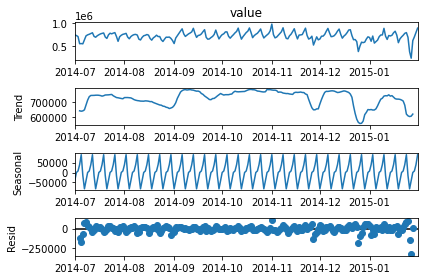

ADF Statistic: -3.448094452075355
p-value: 0.009424599993717633
Is the data stationary? Yes


In [9]:
result = seasonal_decompose(df_day, model='additive')
result.plot()
plt.show()

# Perform ADFuller test
adf_test_result = adfuller(df_day.dropna())
p_value = adf_test_result[1]

print(f'ADF Statistic: {adf_test_result[0]}')
print(f'p-value: {p_value}')
print('Is the data stationary?', 'No' if p_value > 0.05 else 'Yes')


====================================================================================================================

### **Question 2.2**

**Answer:**

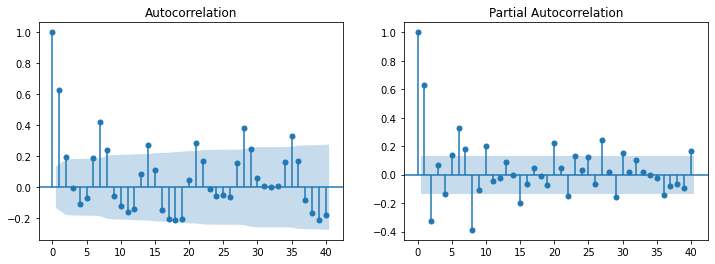

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 4))
plt.subplot(121)
plot_acf(df_day, lags=40, ax=plt.gca())
plt.subplot(122)
plot_pacf(df_day, lags=40, ax=plt.gca())
plt.show()


In [11]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_absolute_error

from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_absolute_error

best_model = None
best_mae = float('inf')

for p in range(3):
    for d in range(3):
        for q in range(3):
            try:
                model = ARIMA(df_day.loc['2014-07-01':'2014-12-01'], order=(p, d, q))
                results = model.fit()
                forecast = results.forecast(steps=31)
                mae = mean_absolute_error(df_day.loc['2015-01-01':'2015-01-31'], forecast)
                if mae < best_mae:
                    best_mae = mae
                    best_model = model
            except:
                continue

if best_model is not None:
    print("Best ARIMA Model:", best_model.order)
else:
    print("No suitable ARIMA model found.")


No suitable ARIMA model found.


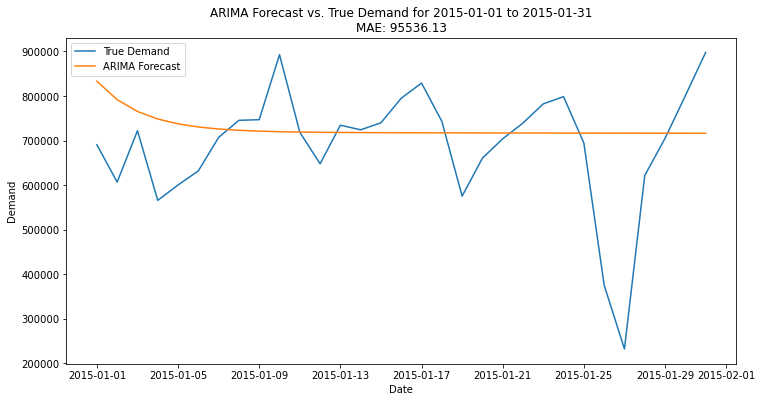

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_absolute_error

# Assuming you have df_day and df_hour already defined

# Fit an ARIMA model to the data
p, d, q = 1, 1, 1  # You can choose the best (p, d, q) values based on previous analysis
model = ARIMA(df_day, order=(p, d, q))
results = model.fit()

# Forecast for January 2015
forecast_start = '2015-01-01'
forecast_end = '2015-01-31'
forecasted_values, _, _ = results.forecast(steps=31)

# Calculate Mean Absolute Error (MAE)
true_demand = df_day[forecast_start:forecast_end]
mae = mean_absolute_error(true_demand, forecasted_values)

# Plot the true demand and ARIMA forecast
plt.figure(figsize=(12, 6))
plt.plot(df_day.index[-31:], true_demand, label='True Demand')
plt.plot(pd.date_range(start=forecast_start, periods=31), forecasted_values, label='ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.title(f'ARIMA Forecast vs. True Demand for {forecast_start} to {forecast_end}\nMAE: {mae:.2f}')
plt.show()




====================================================================================================================

### **Question 2.3**

**Answer:**

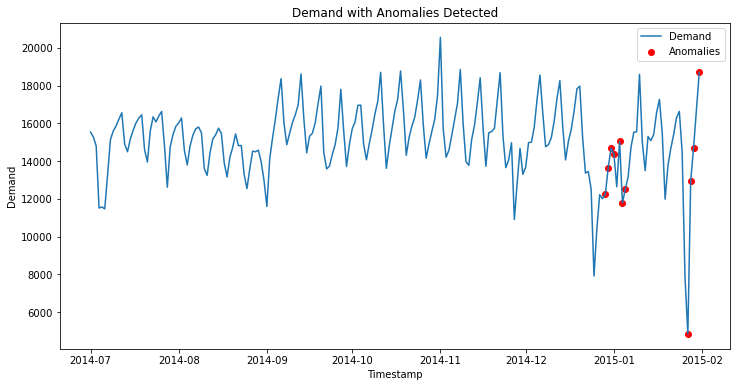

Anomalies Detected:
     timestamp         value  Anomaly
181 2014-12-29  12250.479167       -1
182 2014-12-30  13659.687500       -1
183 2014-12-31  14686.270833       -1
184 2015-01-01  14383.479167       -1
186 2015-01-03  15044.062500       -1
187 2015-01-04  11785.604167       -1
188 2015-01-05  12502.750000       -1
210 2015-01-27   4834.541667       -1
211 2015-01-28  12947.562500       -1
212 2015-01-29  14686.145833       -1
214 2015-01-31  18702.479167       -1


In [24]:
import pandas as pd
from sklearn.ensemble import IsolationForest

import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Read the CSV file and preprocess the data
df = pd.read_csv('nyc_taxi.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

# Resample the data to the desired frequency (e.g., daily)
resampled_frequency = 'D'  # You can change this to 'H' for hourly or 'W' for weekly
df_resampled = df.resample(resampled_frequency).mean().reset_index()

# Create additional features
df_resampled['Weekday'] = df_resampled['timestamp'].dt.strftime('%A')
df_resampled['Hour'] = df_resampled['timestamp'].dt.hour
df_resampled['Day'] = df_resampled['timestamp'].dt.day
df_resampled['Month'] = df_resampled['timestamp'].dt.month
df_resampled['Year'] = df_resampled['timestamp'].dt.year
df_resampled['Month_day'] = df_resampled['timestamp'].dt.day
df_resampled['Lag'] = df_resampled['value'].shift(1)
df_resampled['Rolling_Mean'] = df_resampled['value'].rolling(window=7, min_periods=1).mean()

# Prepare the feature matrix
features = df_resampled[['Weekday', 'Hour', 'Day', 'Month', 'Year', 'Month_day', 'Lag', 'Rolling_Mean']]
features = pd.get_dummies(features, columns=['Weekday'], drop_first=True)
features = features.fillna(features.mean())

# Fit the Isolation Forest model
isolation_forest = IsolationForest(contamination=0.05, random_state=42)
isolation_forest.fit(features)

# Predict anomalies
df_resampled['Anomaly'] = isolation_forest.predict(features)

# Identify and print the dates identified as outliers
outliers = df_resampled[df_resampled['Anomaly'] == -1]  # Anomalies are labeled as -1

# Plot the anomalies
plt.figure(figsize=(12, 6))
plt.plot(df_resampled['timestamp'], df_resampled['value'], label='Demand')
plt.scatter(outliers['timestamp'], outliers['value'], color='red', label='Anomalies')
plt.xlabel('Timestamp')
plt.ylabel('Demand')
plt.legend()
plt.title('Demand with Anomalies Detected')
plt.show()

print("Anomalies Detected:")
print(outliers[['timestamp', 'value', 'Anomaly']])



In [26]:
df_resampled

timestamp         value    Weekday  Hour  Day  Month  Year  Month_day  \
0   2014-07-01  15540.979167    Tuesday     0    1      7  2014          1   
1   2014-07-02  15284.166667  Wednesday     0    2      7  2014          2   
2   2014-07-03  14794.625000   Thursday     0    3      7  2014          3   
3   2014-07-04  11511.770833     Friday     0    4      7  2014          4   
4   2014-07-05  11572.291667   Saturday     0    5      7  2014          5   
..         ...           ...        ...   ...  ...    ...   ...        ...   
210 2015-01-27   4834.541667    Tuesday     0   27      1  2015         27   
211 2015-01-28  12947.562500  Wednesday     0   28      1  2015         28   
212 2015-01-29  14686.145833   Thursday     0   29      1  2015         29   
213 2015-01-30  16676.625000     Friday     0   30      1  2015         30   
214 2015-01-31  18702.479167   Saturday     0   31      1  2015         31   

              Lag  Rolling_Mean  Anomaly  
0             NaN  15540.979167        1  
1    15540.979167  15412.572917        1  
2    15284.166667  15206.590278        1  
3    14794.625000  14282.885417        1  
4    11511.770833  13740.766667        1  
..            ...           ...      ...  
210   7818.979167  12874.401786       -1  
211   4834.541667  12628.976190       -1  
212  12947.562500  12526.473214       -1  
213  14686.145833  12580.431548        1  
214  16676.625000  12875.732143       -1  

[215 rows x 11 columns]

====================================================================================================================